In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold



In [16]:
lfw_people = fetch_lfw_people(min_faces_per_person=10,resize=0.4)
#选取样本量量更多的那些人脸，这样会方便训练
lfw_people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [17]:
lfw_data = pd.DataFrame( lfw_people.data)	
lfw_data['species'] = lfw_people.target_names[lfw_people.target]	
lfw_data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1841,1842,1843,1844,1845,1846,1847,1848,1849,species
0,0.358170,0.309804,0.487582,0.701961,0.801307,0.826144,0.856209,0.882353,0.903268,0.911111,...,0.202614,0.137255,0.129412,0.122876,0.138562,0.139869,0.129412,0.149020,0.156863,Jacques Chirac
1,0.231373,0.413072,0.633987,0.789542,0.886275,0.903268,0.900654,0.896732,0.891503,0.896732,...,0.054902,0.009150,0.019608,0.014379,0.003922,0.000000,0.000000,0.013072,0.020915,Abdullah Gul
2,0.341176,0.330719,0.383007,0.420915,0.450980,0.450980,0.443137,0.427451,0.452288,0.469281,...,0.194771,0.261438,0.294118,0.504575,0.555556,0.554248,0.464052,0.441830,0.503268,Serena Williams


In [18]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 4324
n_features: 1850
n_classes: 158


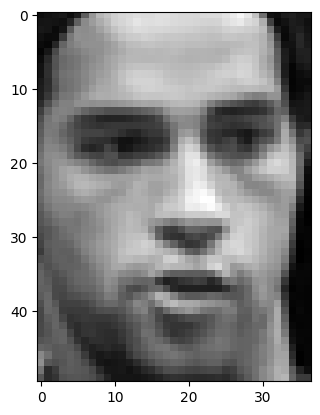

In [19]:
plt.imshow(lfw_people.images[5],cmap='gray')
plt.show()

类别分布: Counter({np.int64(35): 530, np.int64(23): 236, np.int64(149): 144, np.int64(29): 121, np.int64(36): 109, np.int64(11): 77, np.int64(49): 71, np.int64(85): 60, np.int64(61): 55, np.int64(73): 53, np.int64(54): 52, np.int64(134): 52, np.int64(153): 49, np.int64(95): 48, np.int64(37): 44, np.int64(65): 42, np.int64(12): 42, np.int64(91): 41, np.int64(93): 41, np.int64(44): 39, np.int64(2): 39, np.int64(110): 37, np.int64(5): 36, np.int64(3): 35, np.int64(137): 33, np.int64(99): 33, np.int64(146): 33, np.int64(152): 32, np.int64(89): 32, np.int64(129): 32, np.int64(77): 31, np.int64(25): 31, np.int64(122): 30, np.int64(41): 30, np.int64(14): 29, np.int64(97): 29, np.int64(52): 28, np.int64(82): 28, np.int64(124): 27, np.int64(131): 26, np.int64(40): 26, np.int64(144): 25, np.int64(13): 24, np.int64(156): 24, np.int64(68): 24, np.int64(81): 23, np.int64(141): 23, np.int64(132): 23, np.int64(92): 22, np.int64(34): 22, np.int64(119): 22, np.int64(43): 22, np.int64(109): 22, np.int64(4):

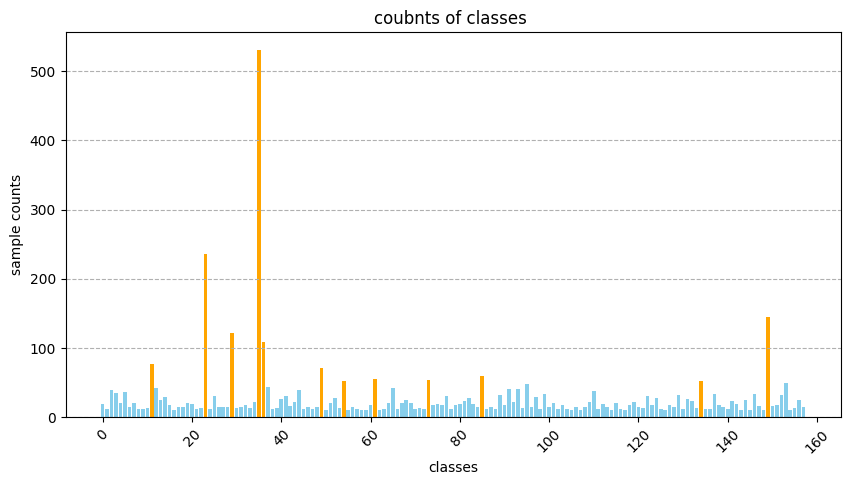

Rare classes train and test sets:
X_rare shape: (2764, 1850)
y_rare shape: (2764,)
X_ma shape: (1560, 1850)
y_ma shape: (1560,)
X_rare_train shape: (2073, 1850)
Unique classes in y_rare_train: 146
X_ma_train shape: (1170, 1850)
Unique classes in y_ma_train: 12
X_rare_test shape: (691, 1850)
Unique classes in y_rare_test: 143
X_ma_test shape: (390, 1850)
Unique classes in y_ma_test: 12
Length of target_names: 158


In [20]:
from collections import Counter

x_train,x_test,y_train,y_test = train_test_split(lfw_people.data,lfw_people.target)#默认比例25%用于做测试集
x_train.shape

class_counts = Counter(lfw_people.target)

print("类别分布:", class_counts)
rare_classes = {cls: count for cls, count in class_counts.items() if 10 <= count <= 50}
ma_classes = {cls: count for cls, count in class_counts.items() if count > 50}
print(f"样本量在10-50之间的类别及数量:")
for cls, count in rare_classes.items():
    print(f"类别 {target_names[cls]}: {count} 个样本")
print("样本量大于50的类别及数量:")
for cls, count in ma_classes.items():
    print(f"类别 {target_names[cls]}: {count} 个样本")


# 提取类别和样本数
rclasses = list(rare_classes.keys())
rcounts = list(rare_classes.values())
mclasses= list(ma_classes.keys())
mcounts = list(ma_classes.values())

# 绘制条形图
plt.figure(figsize=(10, 5))
plt.bar(rclasses, rcounts, color='skyblue')
plt.bar(mclasses, mcounts, color='orange')

plt.xlabel("classes")
plt.ylabel("sample counts")
plt.title("coubnts of classes ")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()
X_rare,y_rare,X_rare_train,y_rare_train,X_rare_test,y_rare_test = [],[],[],[],[],[]
X_ma,y_ma,X_ma_train,y_ma_train,X_ma_test,y_ma_test = [],[],[],[],[],[]
#rare_classes = {cls: count for cls, count in class_counts.items() if 10 <= count <= 30}
for cls in rclasses:
    cls_id=np.where(lfw_people.target==cls)[0]
    X_rare.append(lfw_people.data[cls_id])
    y_rare.append(lfw_people.target[cls_id])

X_rare = np.concatenate(X_rare)
y_rare = np.concatenate(y_rare)
X_rare_train, X_rare_test, y_rare_train, y_rare_test = train_test_split(X_rare, y_rare, test_size=0.25)
#ma_classes = {cls: count for cls, count in class_counts.items() if count > 30}
for cls in mclasses:
    cls_id=np.where(lfw_people.target==cls)[0]
    X_ma.append(lfw_people.data[cls_id])
    y_ma.append(lfw_people.target[cls_id])

X_ma = np.concatenate(X_ma)
y_ma = np.concatenate(y_ma)    
X_ma_train, X_ma_test, y_ma_train, y_ma_test = train_test_split(X_ma, y_ma, test_size=0.25)

print("Rare classes train and test sets:")
print("X_rare shape:", X_rare.shape)
print("y_rare shape:", y_rare.shape)
print("X_ma shape:", X_ma.shape)
print("y_ma shape:", y_ma.shape)
print("X_rare_train shape:", X_rare_train.shape)
print("Unique classes in y_rare_train:", len(np.unique(y_rare_train)))
print("X_ma_train shape:", X_ma_train.shape)
print("Unique classes in y_ma_train:", len(np.unique(y_ma_train)))
print("X_rare_test shape:", X_rare_test.shape)
print("Unique classes in y_rare_test:", len(np.unique(y_rare_test)))
print("X_ma_test shape:", X_ma_test.shape)
print("Unique classes in y_ma_test:", len(np.unique(y_ma_test)))
print("Length of target_names:", len(lfw_people.target_names))

## Using SVC only

In [32]:
model = SVC(kernel='rbf', class_weight='balanced')
#rbf核能拟合高度非线性的数据能应用于图像分类
#balance作用：如果不同类别各自的样本数量差距比较大，
#这时候构建的模型容易把所有的数据归类给样本量大的类别（这时候error rate反而会小）
#解决方法是取出等量的样本个数
#在分类的时候把样本多的权重小一点


model.fit(x_train,y_train)

SVC(class_weight='balanced')

In [34]:

predictions=model.predict(X_ma_test)

labels_in_use, counts_test = np.unique(y_ma_test, return_counts=True)
labels_pred, counts_pred = np.unique(predictions, return_counts=True)

# 构造一个 dict 存 label -> support
support_dict = dict(zip(labels_in_use, counts_test))
for label, count in zip(labels_pred, counts_pred):
    support_dict[label] = support_dict.get(label, 0) + count

# 只保留 support > 0 的 label
labels_filtered = [label for label, support in support_dict.items() if support > 0]
labels_filtered = sorted(set(labels_filtered))  # 去重 + 排序

# 对应的名字
target_names_filtered = [lfw_people.target_names[i] for i in labels_filtered]

# 打印报告
print(classification_report(y_ma_test, predictions,
                            labels=labels_filtered,
                            target_names=target_names_filtered,
                            zero_division=0))



                           precision    recall  f1-score   support

         Alejandro Toledo       0.00      0.00      0.00         0
             Alvaro Uribe       0.00      0.00      0.00         0
             Andre Agassi       0.00      0.00      0.00         0
           Angelina Jolie       0.00      0.00      0.00         0
            Ari Fleischer       0.00      0.00      0.00         0
             Ariel Sharon       0.60      0.29      0.39        21
    Arnold Schwarzenegger       0.00      0.00      0.00         0
     Atal Bihari Vajpayee       0.00      0.00      0.00         0
             Bill Clinton       0.00      0.00      0.00         0
             Bill McBride       0.00      0.00      0.00         0
               Bill Simon       0.00      0.00      0.00         0
            Charles Moose       0.00      0.00      0.00         0
             Colin Powell       0.90      0.16      0.26        58
         Condoleezza Rice       0.00      0.00      0.00     

# PCA降维度

In [23]:

from sklearn.preprocessing import StandardScaler

n_components=50
pca=PCA(n_components=n_components,whiten=True).fit(x_train)
x_all_pca=pca.transform(lfw_people.data)
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)
eigenfaces = pca.components_.reshape((n_components, h, w))

In [24]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

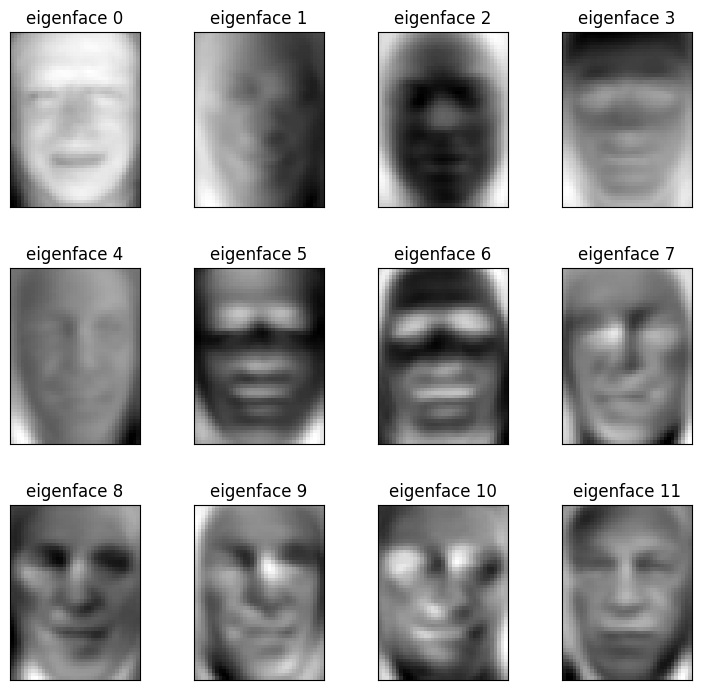

In [25]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [26]:
x_train_pca.shape

(3243, 50)

In [27]:
model = SVC(kernel='rbf',class_weight='balanced')#如果不同类别各自的样本数量差距比较大，
#这时候构建的模型容易把所有的数据归类给样本量大的类别（这时候error rate反而会小）
#解决方法是取出等量的样本个数
#在分类的时候把样本多的权重小一点

model.fit(x_train_pca,y_train)

SVC(class_weight='balanced')

In [28]:
predictions=model.predict(x_test_pca)
print(classification_report(y_test, predictions, target_names=lfw_people.target_names))


ValueError: Number of classes, 156, does not match size of target_names, 158. Try specifying the labels parameter

In [ ]:
param_grid={'C':[0.1,1,5,10,100],
           'gamma':[0.0005,0.001,0.005,0.01],}
#C是正则化参用于损失函数

#gamma 大（如 gamma=10）：核函数衰减快，模型更关注邻近样本，易过拟合（复杂边界）。
#gamma 小（如 gamma=0.01）：核函数衰减慢，决策边界平滑，易欠拟合。
"""SVM 的原始目标是找到一个最优超平面（决策边界）来最大化分类间隔。但现实中的数据往往是非线性可分的，这时就需要核函数：

线性 SVM：

直接用超平面 
wT x+b=0 分类，适用于线性可分数据。

优化目标是最小化∣∣w∣|^2（间隔最大化）。

非线性 SVM：

通过核函数将数据映射到高维空间，在高维空间中用超平面分类。

"""
model=GridSearchCV(SVC(kernel='rbf',class_weight='balanced'),param_grid)
#传入param_grid之后会使用所有C和gamma参数的组合
model.fit(x_train_pca,y_train)
print(model.best_estimator_)


In [ ]:
predictions=model.predict(x_test_pca)
print(classification_report(y_test,predictions,target_names=lfw_people.target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.76      0.81      0.79        16
     Colin Powell       0.82      0.91      0.86        54
  Donald Rumsfeld       0.82      0.80      0.81        41
    George W Bush       0.89      0.91      0.90       131
Gerhard Schroeder       0.52      0.56      0.54        25
      Hugo Chavez       0.86      0.86      0.86        14
   Jacques Chirac       1.00      0.57      0.73        14
    Jean Chretien       0.93      0.76      0.84        17
    John Ashcroft       0.78      0.70      0.74        10
Junichiro Koizumi       1.00      0.93      0.97        15
  Serena Williams       1.00      0.73      0.85        15
       Tony Blair       0.77      0.87      0.81        38

         accuracy                           0.84       390
        macro avg       0.85      0.79      0.81       390
     weighted avg       0.84      0.84      0.84       390



In [ ]:
param_grid={'C':[3,4,5,6,7],
           'gamma':[0.003,0.004, 0.005, 0.006,0.007]}
model=GridSearchCV(SVC(kernel='rbf',class_weight='balanced'),param_grid)
#传入param_grid之后会使用所有C和gamma参数的组合
model.fit(x_train_pca,y_train)
print(model.best_estimator_)

SVC(C=4, class_weight='balanced', gamma=0.007)


In [ ]:
predictions=model.predict(x_test_pca)
print(classification_report(y_test,predictions,target_names=lfw_people.target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.81      0.74        16
     Colin Powell       0.82      0.87      0.85        54
  Donald Rumsfeld       0.86      0.78      0.82        41
    George W Bush       0.92      0.90      0.91       131
Gerhard Schroeder       0.52      0.64      0.57        25
      Hugo Chavez       0.86      0.86      0.86        14
   Jacques Chirac       0.83      0.71      0.77        14
    Jean Chretien       0.87      0.76      0.81        17
    John Ashcroft       0.64      0.70      0.67        10
Junichiro Koizumi       1.00      0.93      0.97        15
  Serena Williams       1.00      0.80      0.89        15
       Tony Blair       0.80      0.84      0.82        38

         accuracy                           0.84       390
        macro avg       0.82      0.80      0.81       390
     weighted avg       0.85      0.84      0.84       390



In [ ]:

X=np.array(x_all_pca)
y=np.array(lfw_people.target)

## With Cross-Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cross_validate_with_accuracy(X, y, model, n_splits=5):
    """
    实现交叉验证并在每个fold输出准确率
    
    参数:
    - X: 特征数据
    - y: 标签数据
    - model: SVC
    - n_splits: 交叉验证的折数
    
    返回:
    - 平均准确率
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
        scaler = StandardScaler()
        X_train, X_test = X[train_idx], X[test_idx]
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        y_train, y_test = y[train_idx], y[test_idx]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"Fold {fold}: Accuracy = {accuracy:.4f}")
    
    avg_accuracy = np.mean(accuracies)
    print(f"\nAverage Accuracy: {avg_accuracy:.4f}")
    return avg_accuracy

# 示例调用
model = SVC(kernel='rbf', class_weight='balanced', C=7, gamma=0.007)  # 使用之前调参的最佳参数

cross_validate_with_accuracy(X, y, model, n_splits=10)

Fold 1: Accuracy = 0.7885
Fold 2: Accuracy = 0.8269
Fold 3: Accuracy = 0.7244
Fold 4: Accuracy = 0.7821
Fold 5: Accuracy = 0.8590
Fold 6: Accuracy = 0.7692
Fold 7: Accuracy = 0.8141
Fold 8: Accuracy = 0.7949
Fold 9: Accuracy = 0.8077
Fold 10: Accuracy = 0.8205

Average Accuracy: 0.7987


np.float64(0.7987179487179488)

In [ ]:
predictions=model.predict(x_test_pca)
print(classification_report(y_test,predictions,target_names=lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.94      0.97        16
     Colin Powell       0.96      0.96      0.96        54
  Donald Rumsfeld       0.95      0.98      0.96        41
    George W Bush       0.98      0.95      0.96       131
Gerhard Schroeder       0.89      1.00      0.94        25
      Hugo Chavez       1.00      1.00      1.00        14
   Jacques Chirac       1.00      0.93      0.96        14
    Jean Chretien       1.00      1.00      1.00        17
    John Ashcroft       0.91      1.00      0.95        10
Junichiro Koizumi       1.00      1.00      1.00        15
  Serena Williams       0.94      1.00      0.97        15
       Tony Blair       0.97      0.97      0.97        38

         accuracy                           0.97       390
        macro avg       0.97      0.98      0.97       390
     weighted avg       0.97      0.97      0.97       390



# 画图

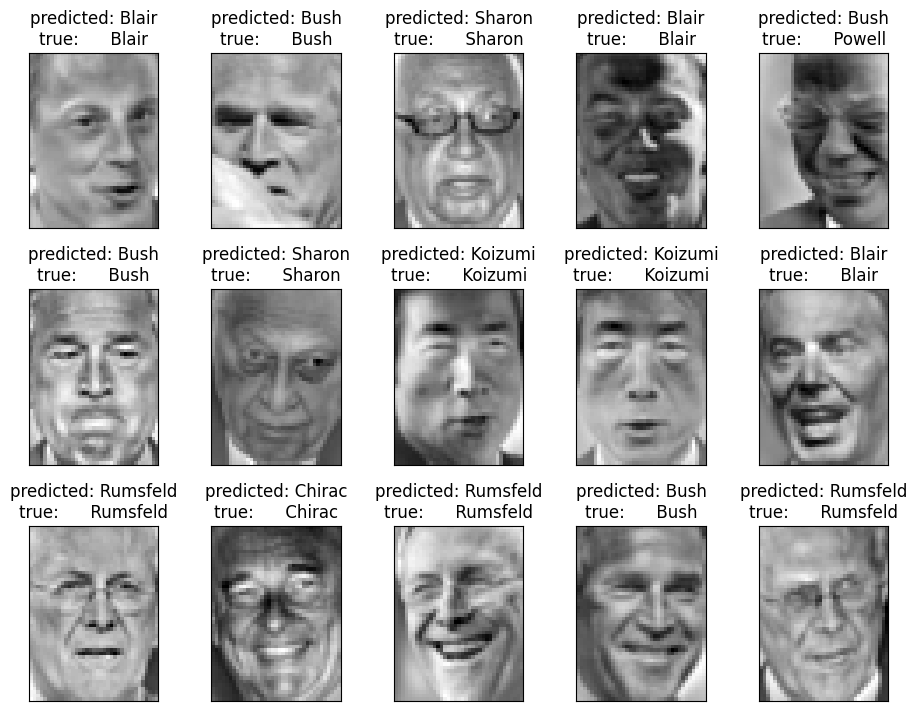

In [ ]:
def plot_gallery(images, titles, h, w, n_rows=3, n_cols=5):
    plt.figure(figsize=(1.8 * n_cols, 2.4 * n_rows))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_rows * n_cols):
        plt.subplot(n_rows, n_cols, i + 1)  # 修正：n_rows 和 i+1（整数索引）
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(prediction, true_label, target_names):
    pred_name = target_names[prediction].split(' ')[-1]
    true_name = target_names[true_label].split(' ')[-1]
    return f'predicted: {pred_name}\ntrue:      {true_name}'

# 修正：传入 predictions[i] 和 y_test[i] 作为参数
prediction_titles = [title(predictions[i], y_test[i], target_names) for i in range(len(predictions))]
plot_gallery(x_test, prediction_titles, h, w)
plt.show()